In [106]:
# coding: utf-8
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pylab as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cm 

#GP-UCB Code
class GPUCB(object):

  def __init__(self, meshgrid, environment, beta=100.):
    '''
    beta (optional): Hyper-parameter to tune the exploration-exploitation
    balance. If beta is large, it emphasizes the variance of the unexplored
    solution solution (i.e. larger curiosity)
    '''
    self.meshgrid = np.array(meshgrid)
    self.environment = environment
    self.beta = beta

    self.X_grid = self.meshgrid.reshape(self.meshgrid.shape[0], -1).T
    self.mu = np.array([0. for _ in range(self.X_grid.shape[0])])
    self.sigma = np.array([0.5 for _ in range(self.X_grid.shape[0])])
    self.X = []
    self.T = []

  def argmax_ucb(self):
    return np.argmax(self.mu + self.sigma * np.sqrt(self.beta))

  def learn(self):
    grid_idx = self.argmax_ucb()
    print "Next Sampling Location is", grid_idx
    self.sample(self.X_grid[grid_idx])
    gp = GaussianProcessRegressor()
    gp.fit(self.X, self.T)
    self.mu, self.sigma = gp.predict(self.X_grid, return_std=True)

  def sample(self, x):
    t = self.environment.sample(x)
    self.X.append(x)
    self.T.append(t)

  def plot(self):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_wireframe(self.meshgrid[0], self.meshgrid[1],
        self.mu.reshape(self.meshgrid[0].shape), alpha=0.5, color='g')
    ax.plot_wireframe(self.meshgrid[0], self.meshgrid[1],
        self.environment.sample(self.meshgrid), alpha=0.5, color='b')
    ax.scatter([x[0] for x in self.X], [x[1] for x in self.X], self.T, c='r',
        marker='o', alpha=1.0)
    plt.savefig('fig_%02d.png' % len(self.X))




Next Sampling Location is 0
Next Sampling Location is 51
Next Sampling Location is 72
Next Sampling Location is 192
Next Sampling Location is 243
Next Sampling Location is 288
Next Sampling Location is 384
Next Sampling Location is 412
Next Sampling Location is 480
Next Sampling Location is 554
Next Sampling Location is 457
Next Sampling Location is 552
Next Sampling Location is 144
Next Sampling Location is 397
Next Sampling Location is 337
Next Sampling Location is 23
Next Sampling Location is 119
Next Sampling Location is 67
Next Sampling Location is 239
Next Sampling Location is 235
Next Sampling Location is 359
Next Sampling Location is 479
Next Sampling Location is 428
Next Sampling Location is 575
Next Sampling Location is 571
Next Sampling Location is 145
Next Sampling Location is 226
Next Sampling Location is 562
Next Sampling Location is 1
Next Sampling Location is 10


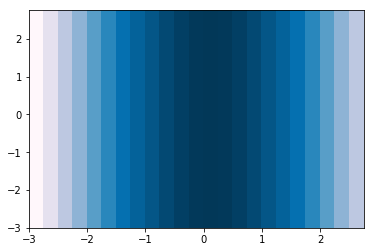

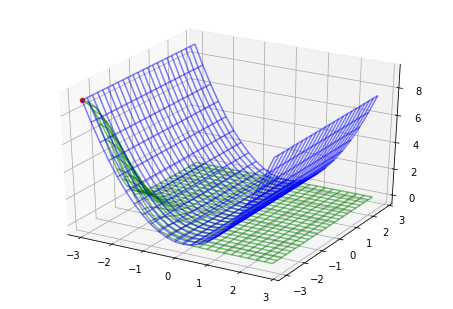

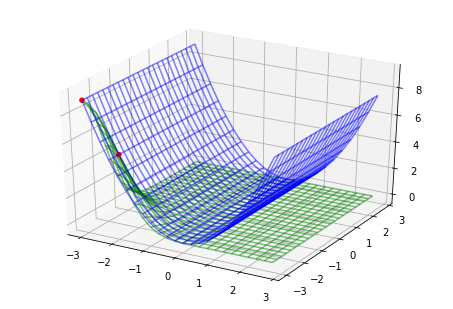

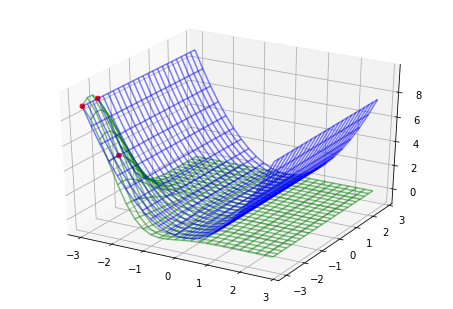

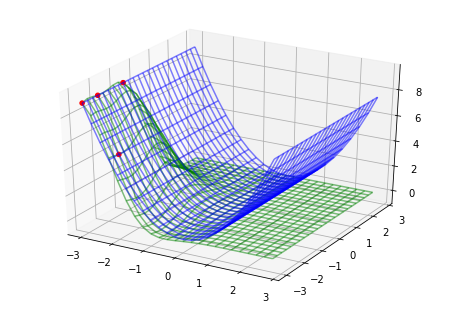

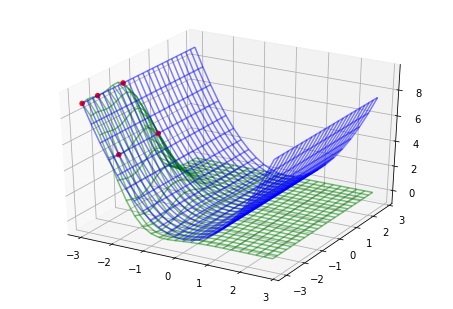

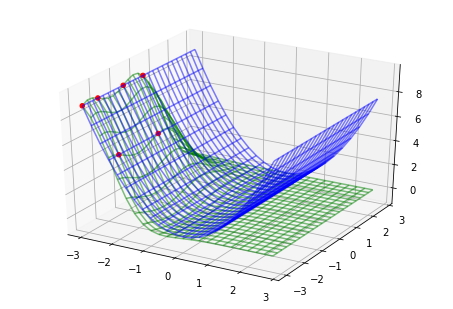

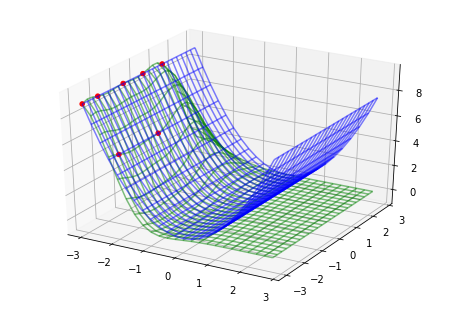

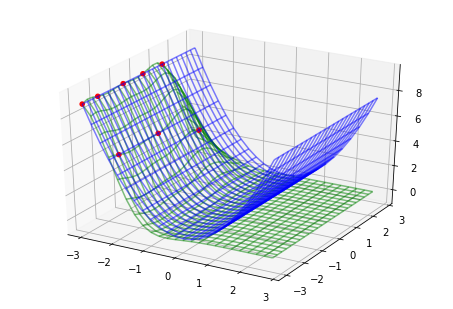

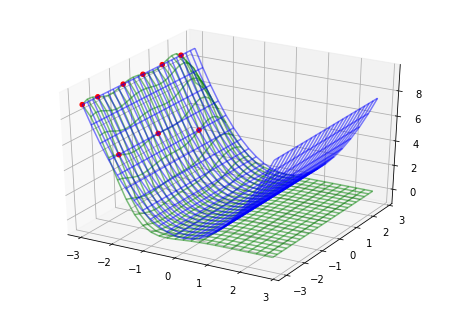

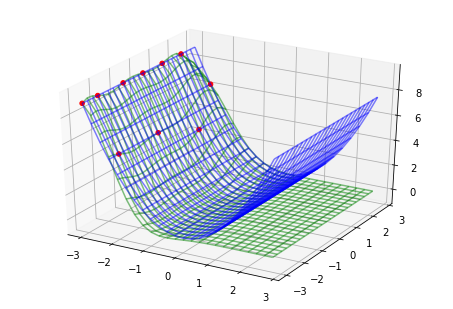

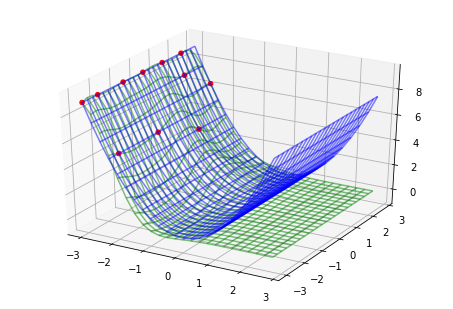

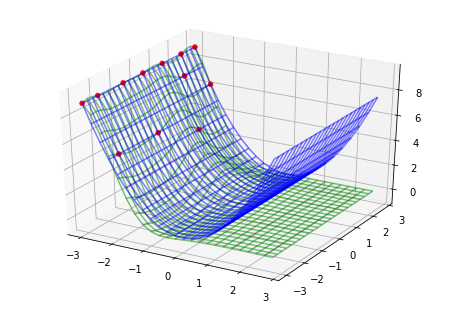

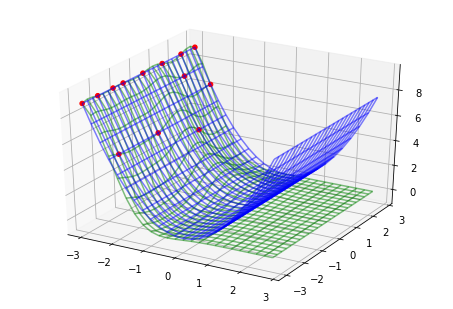

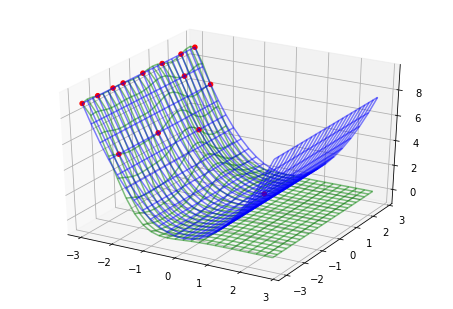

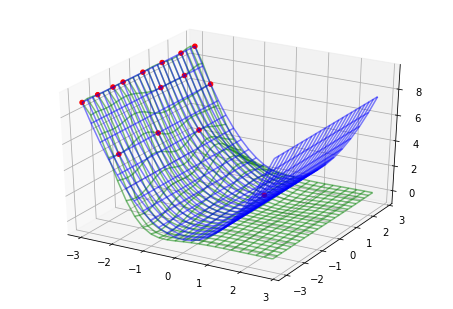

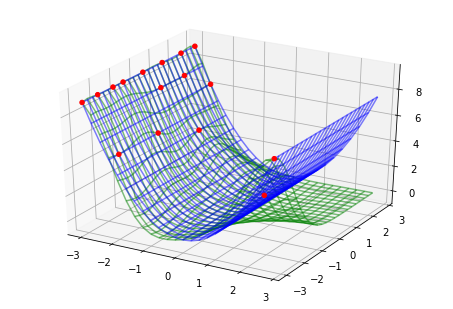

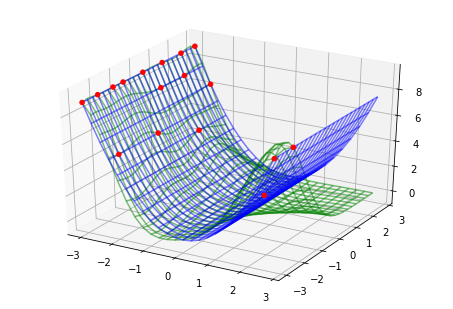

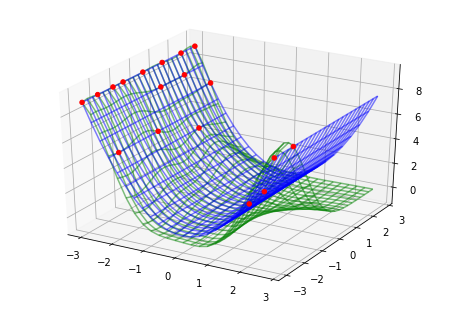

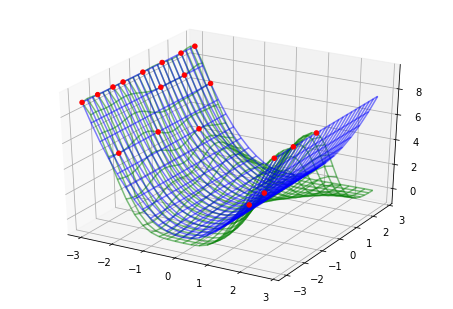

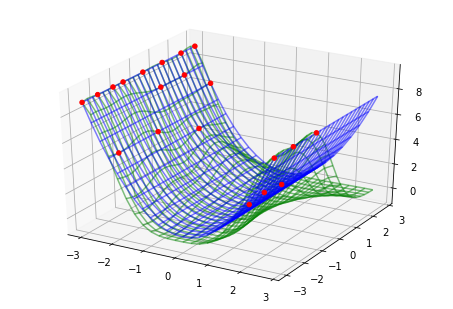

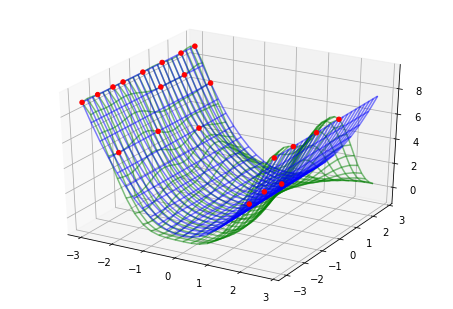

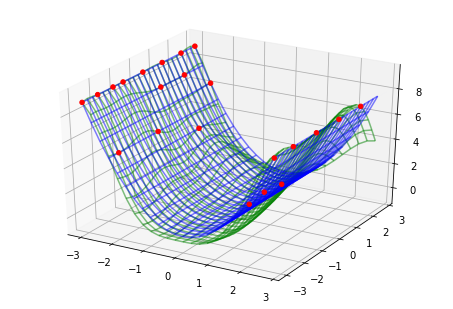

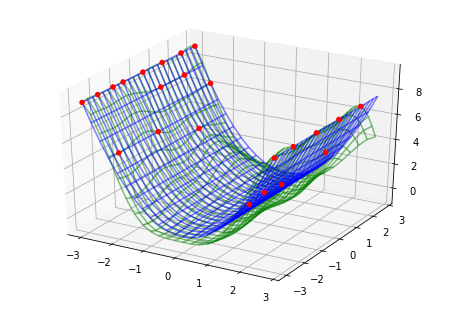

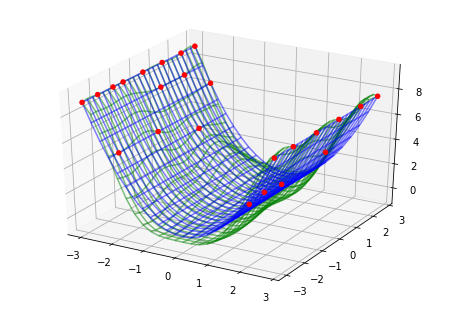

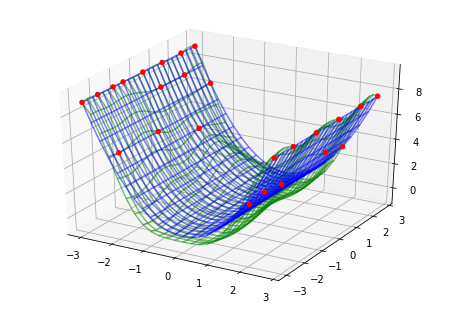

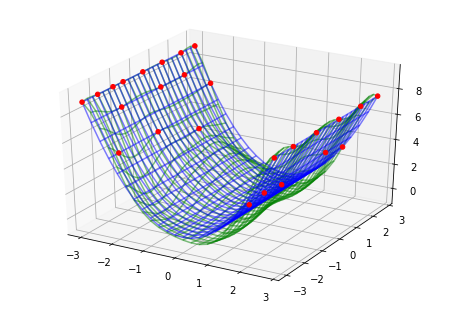

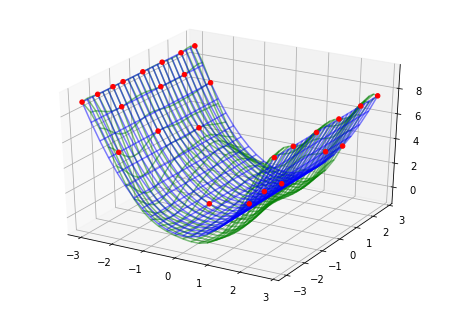

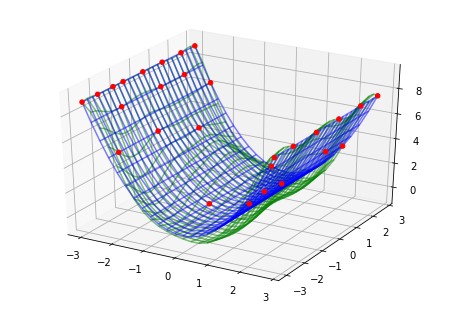

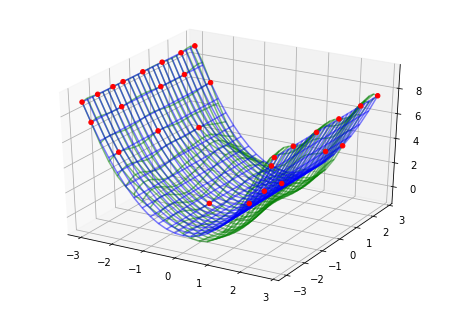

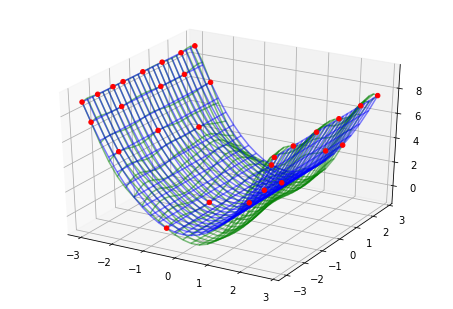

In [107]:
if __name__ == '__main__':
  class DummyEnvironment(object):
    def sample(self, j):
      return (j[0])**2

  x = np.arange(-3, 3, 0.25)
  y = np.arange(-3, 3, 0.25)
  env = DummyEnvironment()
  agent = GPUCB(np.meshgrid(x, y), env)

  
  X, Y = np.meshgrid(x, y) 
  Z = X**2
  plt.pcolormesh(X,Y,Z, cmap='PuBu_r' )

  for i in range(30):
    agent.learn()
    agent.plot()